# Titanic Disaster Project

# Data Exploration

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings

In [2]:
#load dataset

train=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.shape

(891, 12)

# Data Preprocessing

In [6]:
#Check for missing values

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Cabin Missing Column

In [9]:
#analysis of the cabin 

train[(train['Cabin'].isnull()) & train['Survived'] == 1]
print(f"Persons with Missing Cabin that survived {len(train[(train['Cabin'].isnull()) & train['Survived'] == 1])}")


train[(train['Cabin'].isnull()) & train['Survived'] == 0]
print(f"Persons with Missing Cabin that didn\'t survived {len(train[(train['Cabin'].isnull()) & (train['Survived'] == 0)])}")

Persons with Missing Cabin that survived 206
Persons with Missing Cabin that didn't survived 481


Since more people with missing Cabin didn't survive, It is not missing at random. Let's explore this further.

In [10]:
#indicator variable  

train['Cabin_missing'] = np.where(train['Cabin'] == '#',1,0)
test['Cabin_missing'] = np.where(test['Cabin'] == '#',1,0)

In [11]:
#Delete 'Cabin' column as it has a a lot of missing values

del train['Cabin']
del test['Cabin']

In [12]:
#analysis of the missing persons

train[(train['Age'].isnull()) & train['Survived'] == 1]
print(f"Persons with Missing Age that survived {len(train[(train['Age'].isnull()) & train['Survived'] == 1])}")

train[(train['Age'].isnull()) & train['Survived'] == 0]
print(f"Persons with Missing Age that didn\'t survived {len(train[(train['Age'].isnull()) & (train['Survived'] == 0)])}")

Persons with Missing Age that survived 52
Persons with Missing Age that didn't survived 125


Missing Age could be an important feature.

In [13]:
train['Age_missing'] = np.where(train['Age'].isnull(),1,0)
test['Age_missing'] = np.where(test['Age'].isnull(),1,0)

In [14]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
#repalce the missing values 'Embarked' column with the highest occuring frequency.

train['Embarked'] = train['Embarked'].fillna('S') 
test['Embarked'] = test['Embarked'].fillna('S') 

In [16]:
#Create a new feature 'Ticket Length'

In [17]:
def extract_ticket_length(x):
    try:
        return len(x.split(' ')[1])        
    except IndexError:
        return len(x.split(' ')[0])

In [18]:
train['Ticket_length'] = train['Ticket'].apply(lambda x: extract_ticket_length(x))
test['Ticket_length'] = test['Ticket'].apply(lambda x: extract_ticket_length(x))

# Explanatory Data Analysis

In [19]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_missing,Age_missing,Ticket_length
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.0,0.198653,5.294052
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0,0.399210,0.952205
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.0,0.000000,5.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.0,0.000000,6.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.0,0.000000,6.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,0.0,1.000000,7.000000


In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Cabin_missing', 'Age_missing',
       'Ticket_length'],
      dtype='object')

# Columns : Survived

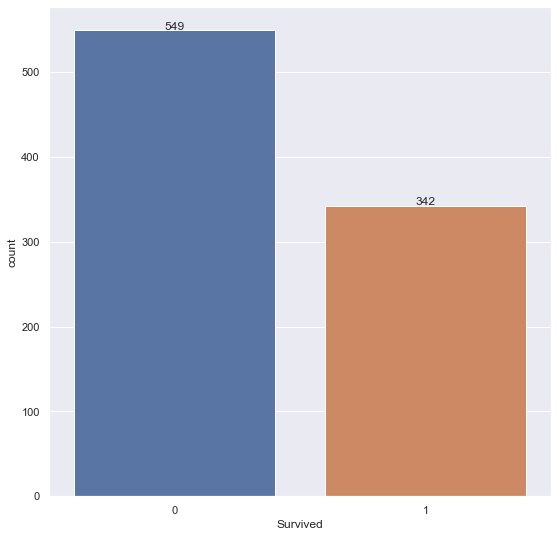

In [21]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize = (9,9))
sns.countplot(x="Survived", data=train)
#annotatinos
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

* Only about 38.38 % (342) of the total passengers (891) survived.

# Column : Pclass

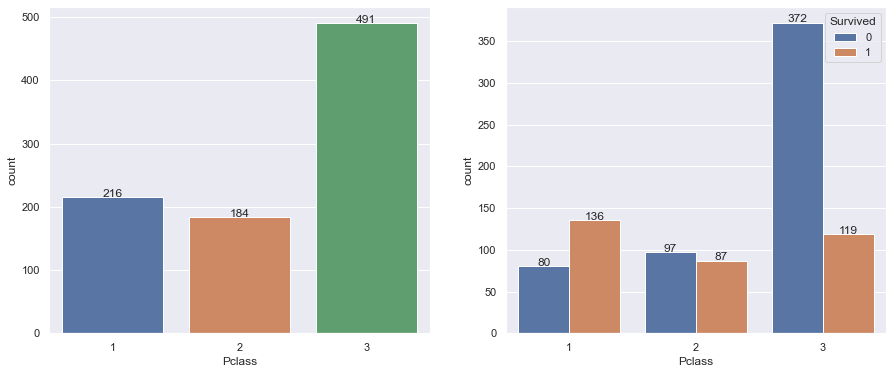

In [22]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Pclass", data=train,ax = ax[0])
sns.countplot(x="Pclass",hue = 'Survived', data=train,ax = ax[1])
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

* About 62.968 % (136) of the 1st classs passengers (216) survived.
* Only 24.23% (119) of the 3rd classs passengers (491) survived.

In [23]:
print('Total Passengers by Pclass')
print(train['Pclass'].value_counts())

Total Passengers by Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [24]:
print('Total Survived Passengers by Pclass')
print(train[train['Survived'] == 1]['Pclass'].value_counts())

Total Survived Passengers by Pclass
1    136
3    119
2     87
Name: Pclass, dtype: int64


In [25]:
print('Percentage of  Survived Passengers by Pclass')
train[train['Survived'] == 1]['Pclass'].value_counts() / train['Pclass'].value_counts()

Percentage of  Survived Passengers by Pclass


1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64

* About 55.1 % (491) of the total passengers (891) booked 3rd class ticket.
* About 62.96 % (136) of the total 1st classs passengers (184) survived.
* Only 24.23% (119) of the total 3rd classs passengers (491) survived.

# Column : Sex

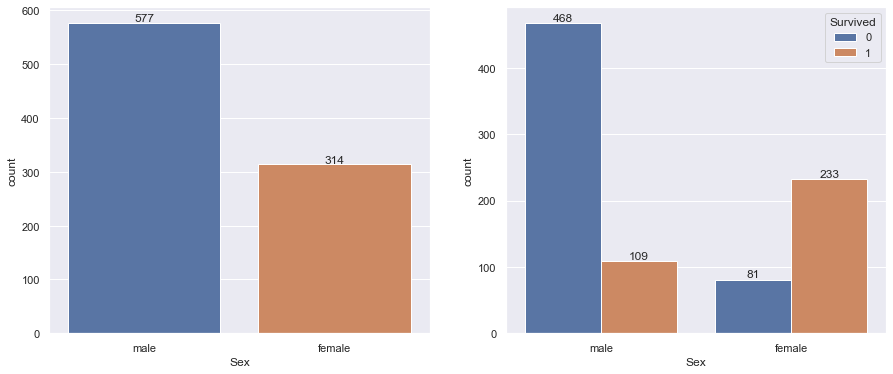

In [26]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Sex", data=train,ax = ax[0])
sns.countplot(x="Sex",hue = 'Survived', data=train,ax = ax[1])
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + 3,height ,ha="center")

<AxesSubplot:ylabel='Sex'>

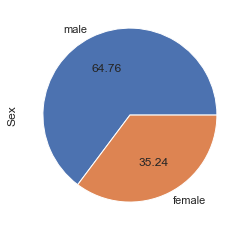

In [27]:
train["Sex"].value_counts().plot.pie(autopct = '%.2f')

In [28]:
print('Passengers composition by Sex')
train['Sex'].value_counts()

Passengers composition by Sex


male      577
female    314
Name: Sex, dtype: int64

In [29]:
print('Survived Passengers composition by Sex')
train[train['Survived'] == 1]['Sex'].value_counts()

Survived Passengers composition by Sex


female    233
male      109
Name: Sex, dtype: int64

* About 74.2 % (233) of the total Female passengers (314) survived. 
* About 18.89 % (109) of the total Male passengers (577) survived.

# Column : Age

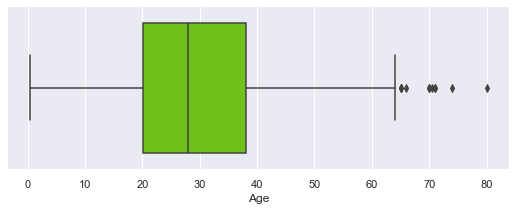

In [30]:
fig,ax = plt.subplots(figsize = (9,3))
ax = sns.boxplot(x=train['Age'],color = '#6edb00')

<AxesSubplot:xlabel='Age', ylabel='Count'>

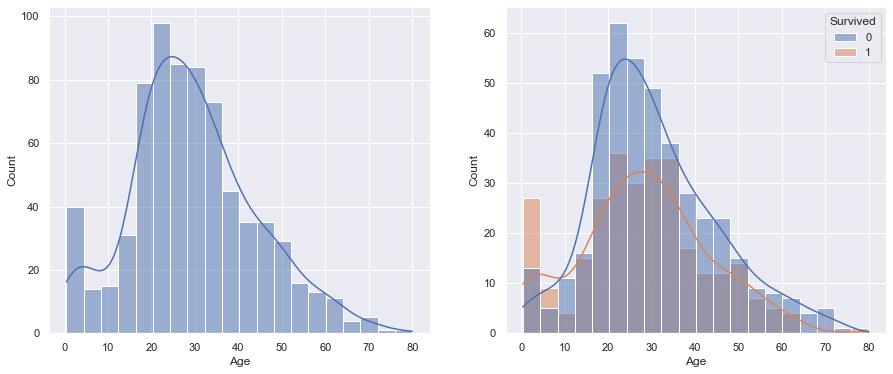

In [31]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.histplot(x="Age",kde = True ,data=train,ax = ax[0])
sns.histplot(x="Age",kde = True, hue = 'Survived',data=train,ax = ax[1])

# Analysis of minor-passengers

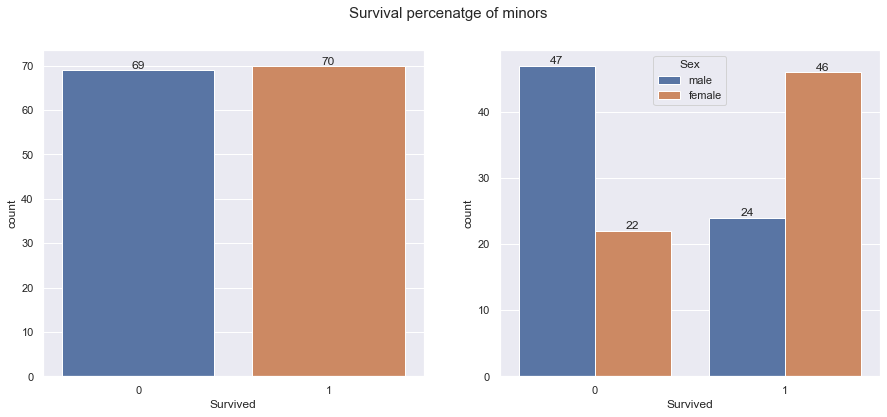

In [32]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['Age'] <=18.0],ax = ax[0])
sns.countplot(x="Survived", data=train[train['Age'] <=18.0],hue = 'Sex',ax = ax[1])
fig.suptitle('Survival percenatge of minors', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

Text(0.5, 0.98, 'Age distribution of minors')

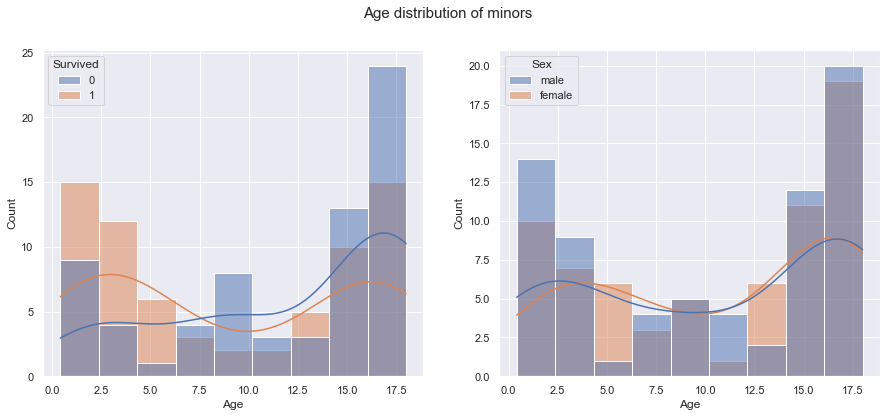

In [33]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True, hue = 'Survived',data=train[train['Age'] <=18.0],ax = ax[0])
sns.histplot(x="Age",kde = True, hue = 'Sex',data=train[train['Age'] <=18.0],ax = ax[1])
fig.suptitle('Age distribution of minors', fontsize=15)

In [34]:
print('Total minors Sex-wise')
train[train['Age'] <=18.0]['Sex'].value_counts()

Total minors Sex-wise


male      71
female    68
Name: Sex, dtype: int64

* About 15.60% (139) of the total passengers (891) were minors.
* About 50.35% (70) of the minor passengers (139) survived.
* About 67.64% (46) of the female-minor passengers (68) survived.

# Column : SibSp (Number of Siblings / Spouses Aboard)

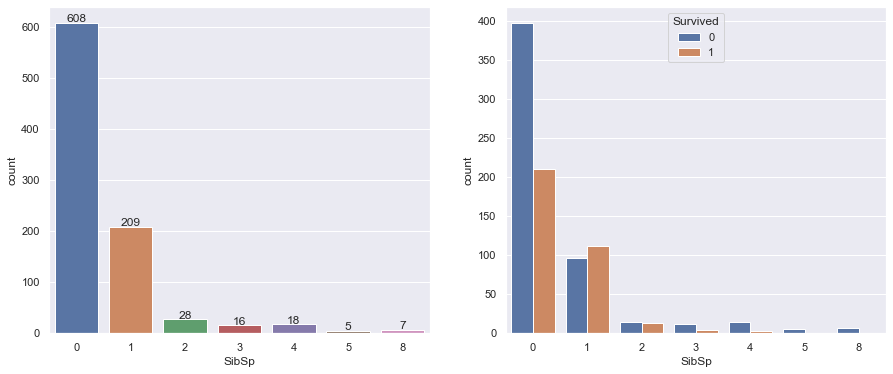

In [35]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="SibSp", data=train,ax = ax[0])
sns.countplot(x="SibSp",hue = 'Survived', data=train,ax = ax[1])
#annotatinos
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

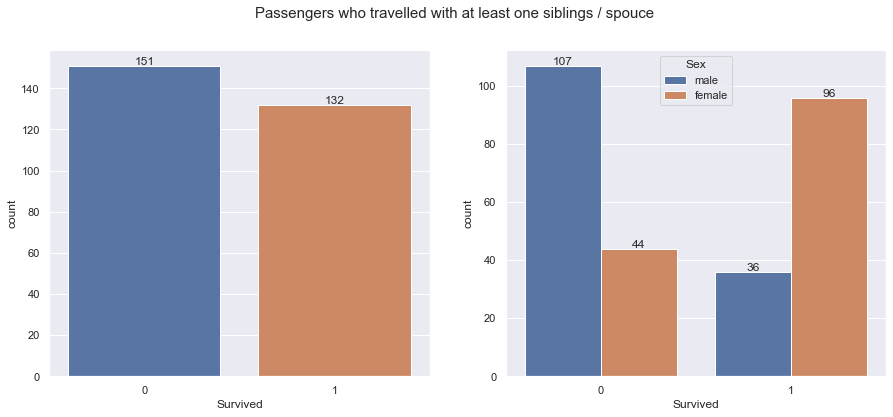

In [36]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['SibSp'] >= 1],ax = ax[0])
sns.countplot(x="Survived", data=train[train['SibSp'] >= 1],hue = 'Sex',ax = ax[1])
fig.suptitle('Passengers who travelled with at least one siblings / spouce', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

In [37]:
print('Gender distribution of Passengers who travelled with one or more siblings/spouce')
train[(train['SibSp'] >= 1)]['Sex'].value_counts()

Gender distribution of Passengers who travelled with one or more siblings/spouce


male      143
female    140
Name: Sex, dtype: int64

* About 46.64% (132) of the total passengers (283) survived who travelled with one or more siblings / spouce.
* About 44.58% (140) of the total female-passengers (314) travelled with one or more siblings / spouce.
* About 68.57% (96) of the total female-passengers (140) survived who travelled with one or more siblings / spouce.
* Only 25.17% (36) of the total male-passengers (143) survived who travelled with one or more siblings / spouce.

# Column : Parch (Number of Parents/Children Aboard)

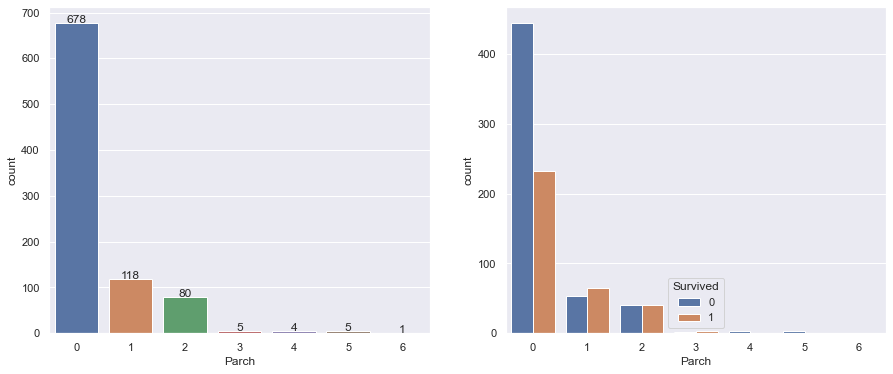

In [38]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1, 2,figsize = (15,6))
ax[0] = sns.countplot(x="Parch", data=train,ax = ax[0])
ax[1] = sns.countplot(x="Parch",hue = 'Survived', data=train,ax = ax[1])
#annotatinos
for i in np.arange(1):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

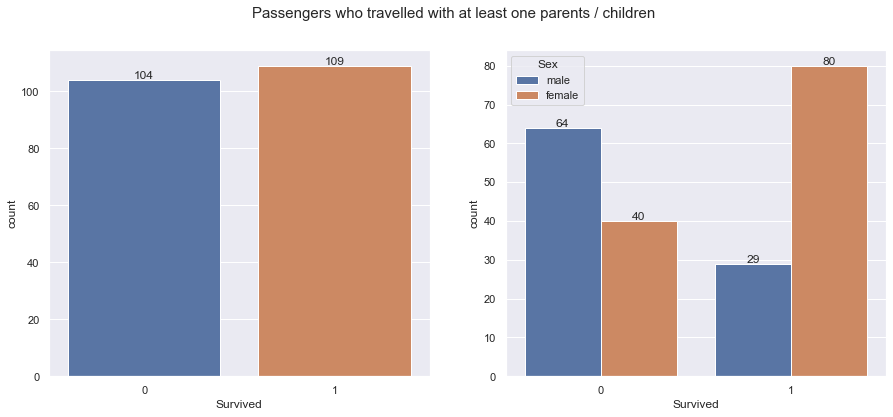

In [39]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['Parch'] >= 1],ax = ax[0])
sns.countplot(x="Survived", data=train[train['Parch'] >= 1],hue = 'Sex',ax = ax[1])
fig.suptitle('Passengers who travelled with at least one parents / children', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

In [40]:
print('Age description of passengers who travelled with one or more parents / children')
train[train['Parch'] >= 1]['Age'].describe()

Age description of passengers who travelled with one or more parents / children


count    193.000000
mean      23.006062
std       17.145160
min        0.420000
25%        7.000000
50%       22.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64

* About 51.17% (109) of the total passengers (213) survived who travelled with one or more parents / children.
* About 38.21% (120) of the total female-passengers (314) survived travelled with one or more parents / children.
* About 66.66% (80) of the total female-passengers (120) survived who travelled with one or more parents / children.
* About 38.18% (29) of the total male-passengers (93) survived who travelled with one or more parents / children.

# Skewness

In [41]:
train.skew()

PassengerId      0.000000
Survived         0.478523
Pclass          -0.630548
Age              0.389108
SibSp            3.695352
Parch            2.749117
Fare             4.787317
Cabin_missing    0.000000
Age_missing      1.513110
Ticket_length   -0.945023
dtype: float64

# Let's See the Correlation among these attributes

In [42]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_missing,Age_missing,Ticket_length
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,NaN,-0.020167,-0.036993
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,NaN,-0.092197,-0.057147
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,NaN,0.172933,-0.001220
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN,NaN,-0.040182
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,NaN,0.018958,-0.059953
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,NaN,-0.124104,-0.035101
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,NaN,-0.100707,-0.064139
Cabin_missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_missing,-0.020167,-0.092197,0.172933,NaN,0.018958,-0.124104,-0.100707,NaN,1.000000,-0.014918
Ticket_length,-0.036993,-0.057147,-0.001220,-0.040182,-0.059953,-0.035101,-0.064139,NaN,-0.014918,1.000000


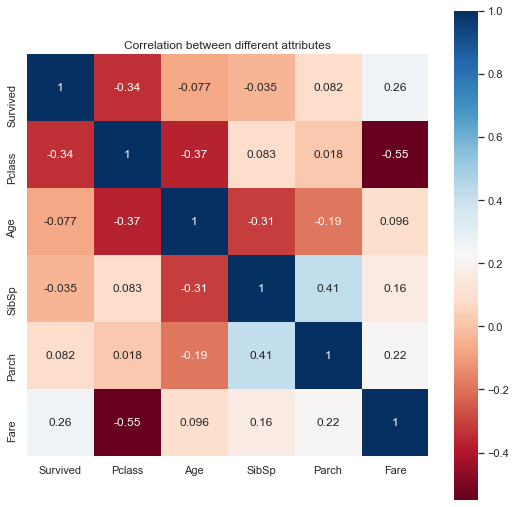

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(train.drop(['PassengerId','Cabin_missing', 'Age_missing',
       'Ticket_length'],axis = 1).corr(), vmax=1, square=True,annot=True,cmap='RdBu')
plt.title('Correlation between different attributes')
plt.show()

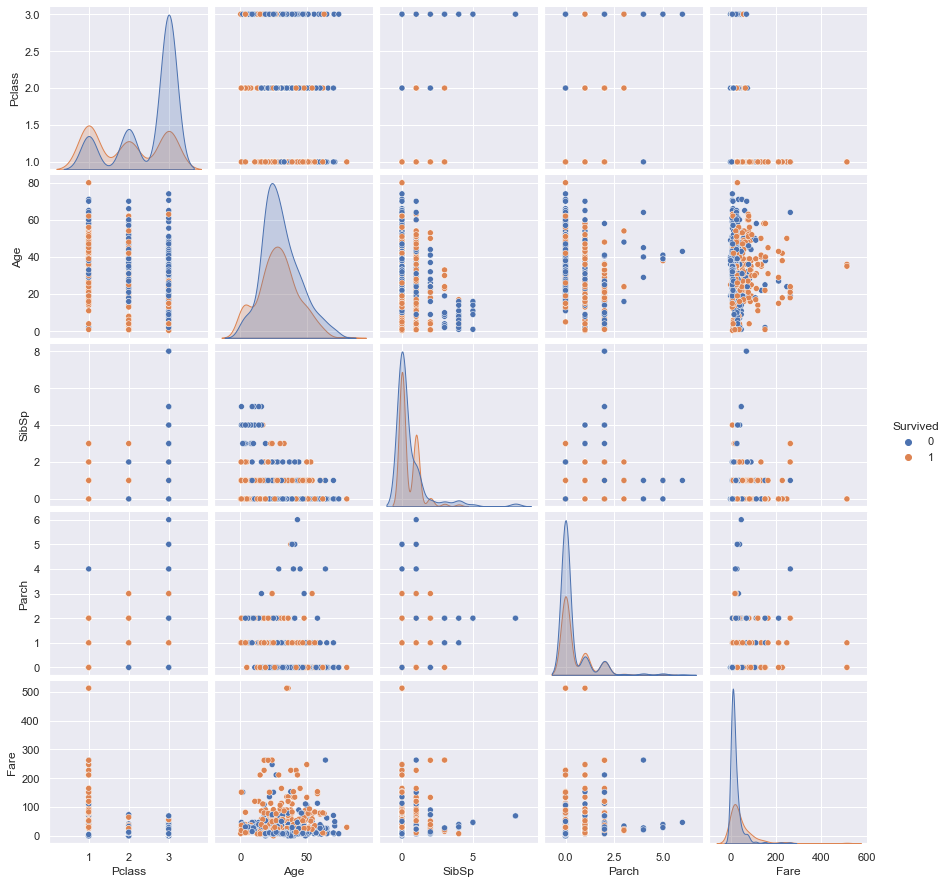

In [44]:
sns.pairplot(train.drop(['PassengerId','Cabin_missing', 'Age_missing','Ticket_length' ],axis = 1), hue="Survived")

# One-hot encoding

In [45]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Cabin_missing', 'Age_missing',
       'Ticket_length'],
      dtype='object')

In [46]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Cabin_missing', 'Age_missing',
       'Ticket_length'],
      dtype='object')

In [47]:
#grab the ids of the passenger's id of the test data 

ids = test['PassengerId']

In [48]:
cols_to_drop = ['PassengerId','Name','Ticket']

In [49]:
train = train.drop(['PassengerId','Name','Ticket'],axis = 1)
test = test.drop(['PassengerId','Name','Ticket'],axis = 1)

# Creating Dummies

In [50]:
dummies_Embarked=pd.get_dummies(train['Embarked'],prefix='Embarked')
dummies_Sex=pd.get_dummies(train['Sex'],prefix='Sex')
dummies_Pclass=pd.get_dummies(train['Pclass'],prefix='Pclass')
df=pd.concat([train,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)
df.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,Cabin_missing,Age_missing,Ticket_length,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,0,5,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,5,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,7,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,6,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,6,0,0,1,0,1,0,0,1


# Impute the missing values

In [51]:
## Train-Test Split
from sklearn.model_selection import train_test_split

In [52]:
# separate intro train and test set

X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis=1),  # just the features
    train['Survived'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  # for reproducibility

print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (623, 10)
x test:  (268, 10)
y train:  (623,)
y test:  (268,)


In [53]:
#impute the misssing values with median
X_test['Age'] = X_test['Age'].fillna(X_train['Age'].median())
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())

In [54]:
#impute the misssing values with median in the test
test['Age'] = test['Age'].fillna(X_train['Age'].median())
test['Fare'] = test['Fare'].fillna(X_train['Fare'].median())

In [55]:
print('Check the missing values of test')
test.isnull().sum()

Check the missing values of test


Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Cabin_missing    0
Age_missing      0
Ticket_length    0
dtype: int64

In [56]:
#One Hot Encoding

In [57]:
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

In [58]:
ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    drop_last=True) 

In [59]:
ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True)

In [60]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)
test = ohe_enc.transform(test)

In [61]:
#scale the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
test_std = scaler.transform(test)

# Model Preparation

* Logistic Regression(Lasso)
* Logistic Regression(Ridge)
* Random Forest Classifier
* Gradients Boosting Classifier





# Logistic Regression(Lasso)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [63]:
logisticRegr = LogisticRegression(penalty='l1', solver='liblinear')
#fit the model
logisticRegr.fit(X_train_std, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [64]:
#predictions and score
predictions = logisticRegr.predict(X_test_std)
print(f"The score on the Test-dataset is {logisticRegr.score(X_test_std, y_test)}")
print(f"The score on the Train-dataset is {logisticRegr.score(X_train_std, y_train)}")

The score on the Test-dataset is 0.8022388059701493
The score on the Train-dataset is 0.797752808988764


In [65]:
def plot_condution_metrics(y_test,predictions):
    #condusion metrics
    cm = metrics.confusion_matrix(y_test, predictions)
    score = np.mean([y_test == predictions])
    #plot
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True,cbar = False);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

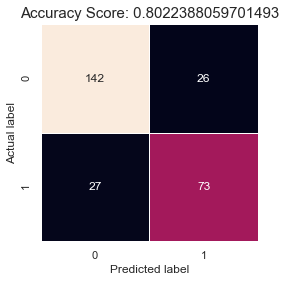

In [66]:
#confusion metrics
plot_condution_metrics(y_test,predictions)

In [67]:
#cross-val score
score = cross_val_score(logisticRegr, X_train_std, y_train, cv=9,scoring='accuracy')
print(f'The Cross-Valiation Score is {score.mean()}')

The Cross-Valiation Score is 0.7929836668967103


In [68]:
#store the cv-score
model_performance = {}
model_performance['Logistic Regression(Lasso)'] = score.mean()

# Logistic Regression(Ridge)

In [69]:
logisticRegr = LogisticRegression(penalty='l2', solver='liblinear')
#fit the model
logisticRegr.fit(X_train_std, y_train)

LogisticRegression(solver='liblinear')

In [70]:
#predictions and score
predictions = logisticRegr.predict(X_test_std)
print(f"The score on the Test-dataset is {logisticRegr.score(X_test_std, y_test)}")
print(f"The score on the Train-dataset is {logisticRegr.score(X_train_std, y_train)}")

The score on the Test-dataset is 0.8097014925373134
The score on the Train-dataset is 0.797752808988764


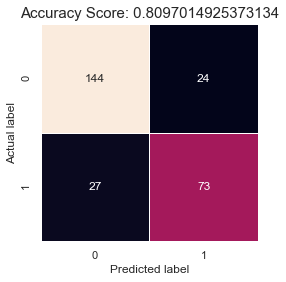

In [71]:
#confusion metrics
plot_condution_metrics(y_test,predictions)

In [72]:
#cross-val score
score = cross_val_score(logisticRegr, X_train_std, y_train, cv=9,scoring='accuracy')
print(f'The Cross-Valiation Score is {score.mean()}')

The Cross-Valiation Score is 0.7913733609385782


In [73]:
model_performance['Logistic Regression(Ridge)'] = score.mean()

# Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=6)

In [75]:
rand_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=6)

In [76]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_depth = 18,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 6,
 n_estimators = 115,random_state=6)

In [77]:
rand_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_split=6,
                       n_estimators=115, random_state=6)

In [78]:
rand_clf.score(X_test,y_test)

0.8283582089552238

In [79]:
rand_clf.score(X_train,y_train)

0.9325842696629213

In [80]:
model_performance['Random Forest Classifier'] = score.mean()

# Gradients Boosting Classifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
    max_depth=1, random_state=12).fit(X_train, y_train)

y_pred_g = clf.predict(X_test)

In [83]:
metrics.accuracy_score(y_test, y_pred_g)

0.8134328358208955

In [84]:
model_performance['Gradients Boosting Classifier'] = score.mean()

In [85]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Cabin_missing,Age_missing,Ticket_length,Sex_male,Embarked_S,Embarked_C
857,1,51.0,0,0,26.5500,0,0,6,1,1,0
52,1,49.0,1,0,76.7292,0,0,5,0,0,1
386,3,1.0,5,2,46.9000,0,0,4,1,1,0
124,1,54.0,0,1,77.2875,0,0,5,1,1,0
578,3,29.0,1,0,14.4583,0,1,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
835,1,39.0,1,1,83.1583,0,0,5,0,0,1
192,3,19.0,1,0,7.8542,0,0,6,0,1,0
629,3,29.0,0,0,7.7333,0,1,6,1,0,0
559,3,36.0,1,0,17.4000,0,0,6,0,1,0


In [86]:
finalmodel = RandomForestClassifier( max_depth = 18, max_features = 'auto', min_samples_split= 6, n_estimators = 115 ,random_state=6)

In [87]:
finalmodel.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, min_samples_split=6, n_estimators=115,
                       random_state=6)

In [88]:
import numpy as np
finalmodel.predict([[0,0,1.0,22,0,35,1,1,1,0,1]])

array([0], dtype=int64)

In [89]:
import pickle 
filename = 'finalized_titanic_model.pk'
pickle.dump(finalmodel, open(filename, 'wb'))

In [90]:
loaded_model1 = pickle.load(open(filename, 'rb'))

In [91]:
loaded_model1.predict([[0,0,1.0,22,0,35,1,1,1,0,1]])

array([0], dtype=int64)

In [92]:
type(loaded_model1)

sklearn.ensemble._forest.RandomForestClassifier

In [93]:
loaded_model1


RandomForestClassifier(max_depth=18, min_samples_split=6, n_estimators=115,
                       random_state=6)